# Experiment 6 handwritten digits classification using CNN

## Task

Create a neural networks (convnets) for grayscale image classification. Using data augmentation to mitigate overfitting, fine-tuning a pretrained convnet and visualizing what convnets learn
<ul> 
    <li> Understanding convolutional neural networks (convnets)
    <li> Using data augmentation to mitigate overfitting
    <li> Using a pretrained convnet to do feature extraction
    <li> Fine-tuning a pretrained convnet
    <li> Visualizing what convnets learn 
</ul>

# 1 Methodology

First, we’ll feed the neural network the training data, train_images and train_labels.<br>
The network will then learn to associate images and labels.<br>
Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.

# 2 The MNIST dataset

## 2.1 Introduction of MNIST dataset

MNIST - a handwritten digits dataset
<ul>
    <li> a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology in the 1980s.
    <li> It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. (Modified NIST)
    <li> It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.
</ul>

![sample.png](sample.png)

## 2.2 Load MNIST data

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


# 2 Encoding the sequences into a binary matrix

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

# 3 Building convolutional network

In [5]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(((2,2))))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(((2,2))))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# 4 Adding a classifier on top of the convnet

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 5 Training the convnet on MNIST images

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0441 - acc: 0.9849
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0113 - acc: 0.9962
Epoch 3/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0078 - acc: 0.9974
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0059 - acc: 0.9981: 1s - loss: 0.0059 - ac
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0047 - acc: 0.9984
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0037 - acc: 0.9988
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0031 - acc: 0.9991
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0026 - acc: 0.9992
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0023 - acc: 0.9993: 2s - loss: 0.0022 - 
Epoch 

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 397us/step


In [12]:
test_loss

0.005404932389887654

# 6 Show image data

In [14]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
img = train_images[0]
img.shape

(28, 28, 1)

In [16]:
img = img.reshape(28,28)

In [17]:
import matplotlib.pyplot as plt

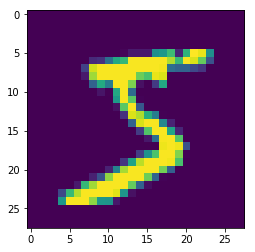

In [18]:
plt.imshow(img)

# 6 Generate predictions on new data

In [19]:
import matplotlib.image as pimg
import numpy as np

In [34]:
import os
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = pimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images
digits = load_images("digits")
digits[2] = digits[2][...,1]
len(digits)

4

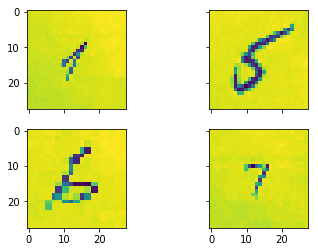

In [35]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
k=0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(digits[k])
        k += 1

In [36]:
digits = np.asarray(digits)
digits = digits.reshape(-1,28,28,1)
digits.shape

(4, 28, 28, 1)

In [37]:
preducted_result = model.predict(digits)

In [38]:
[p for p in preducted_result]

[array([0.11344456, 0.06765027, 0.07690201, 0.02362131, 0.11403166,
        0.08011246, 0.26873976, 0.04032859, 0.17546089, 0.03970847],
       dtype=float32),
 array([0.1091435 , 0.05015406, 0.02163293, 0.03434753, 0.01569015,
        0.24933542, 0.10369293, 0.01356289, 0.23453031, 0.16791031],
       dtype=float32),
 array([0.05396765, 0.03711477, 0.10653638, 0.0478566 , 0.04106327,
        0.05575153, 0.06556556, 0.01728752, 0.5587522 , 0.01610451],
       dtype=float32),
 array([0.10805084, 0.05760669, 0.12053138, 0.01965775, 0.07770276,
        0.10973168, 0.1650745 , 0.03132244, 0.2720726 , 0.03824935],
       dtype=float32)]

In [39]:
for i, d in enumerate(preducted_result):
    print('image {}: is {}'.format(i+1,d.argmax()))

image 1: is 6
image 2: is 5
image 3: is 8
image 4: is 8


# 7 Analysis and Conclusion